# Titanic Disaster Survival Prediction


The Titanic was a catastrophy in itself.  
We are provided with the dataset which contains various attributes of the passengers onboard such as Age, Gender, etc.  
  
We will be using a suitable model to predict survival probability of the passengers based on various attributes.  

## Sections:  
1. <a href=#Data-Wrangling>Data Wrangling Phase</a>
2. <a href=#Data-Exploration>Data Exploration Phase</a>

## Data Wrangling

The Dataset contains:  
  
1. *survival*: Depicts Survival of the passenger. 0 = No, 1 = Yes  
2. *pclass*: Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd  
3. *sex*: Sex of the passenger. male or female  	
4. *Age*: Age in years.   	
5. *sibsp*: no. of siblings / spouses aboard the Titanic.  	
6. *parch*:	no. of parents / children aboard the Titanic.  	
7. *ticket*: Ticket number.  	
8. *fare*: Passenger fare.  	
9. *cabin*: Cabin number.  	
10. *embarked*: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton.  

In [2]:
#importing necessary libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
data = pd.read_csv("C:\\Users\\sidgo\\Desktop\\Titanic\\Datasets\\train.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
sorted(data['Age'].unique())

[0.82999999999999996,
 2.0,
 3.0,
 4.0,
 5.0,
 7.0,
 8.0,
 11.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 28.5,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 38.0,
 nan,
 0.41999999999999998,
 0.67000000000000004,
 0.75,
 0.92000000000000004,
 1.0,
 6.0,
 9.0,
 10.0,
 12.0,
 13.0,
 14.5,
 20.5,
 23.5,
 24.5,
 30.5,
 32.5,
 34.5,
 36.0,
 36.5,
 37.0,
 39.0,
 40.0,
 40.5,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 45.5,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 55.5,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 70.0,
 70.5,
 71.0,
 74.0,
 80.0]

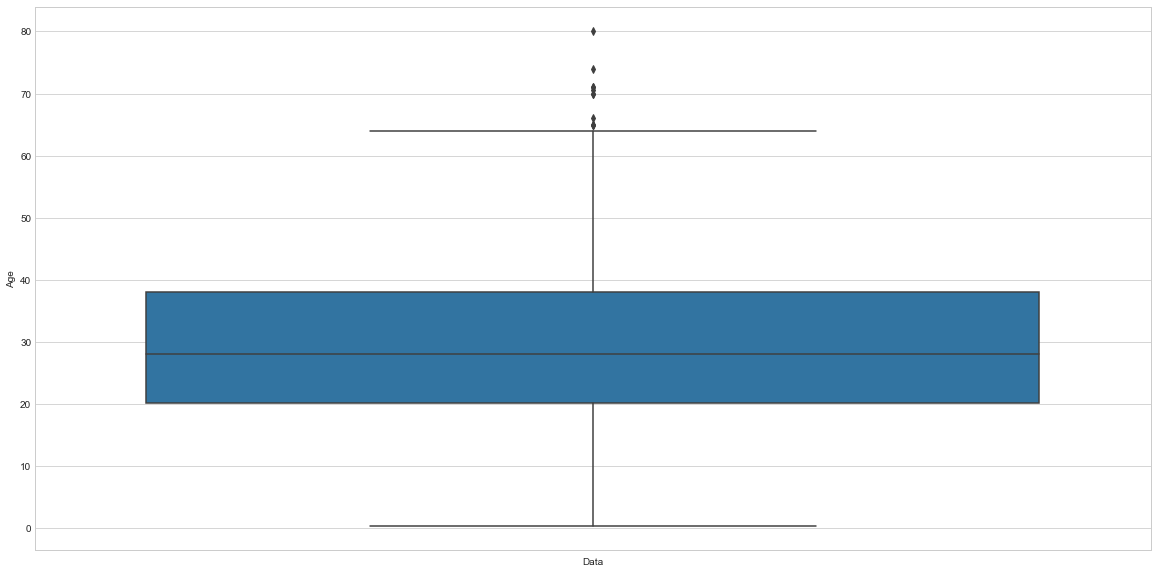

In [26]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
ax = sns.boxplot(y=data['Age'])
plt.ylabel('Age')
plt.xlabel('Data')
plt.show()

First of all, the there are missing values in Age or NaN values.  
Also, there are values less than 1 for Age.  
We see that there are outliers in Age around 65.  
It is given in dataset that Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

Let's see other attributes too.  


In [28]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [29]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)